In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df['Gender'] = df['Gender'].replace(['Male'],0)
df['Gender'] = df['Gender'].replace(['Female'],1)
df = df.rename(columns={"Annual Income (k$)":"Income"})
df = df.rename(columns={"Spending Score (1-100)":"Score"})
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


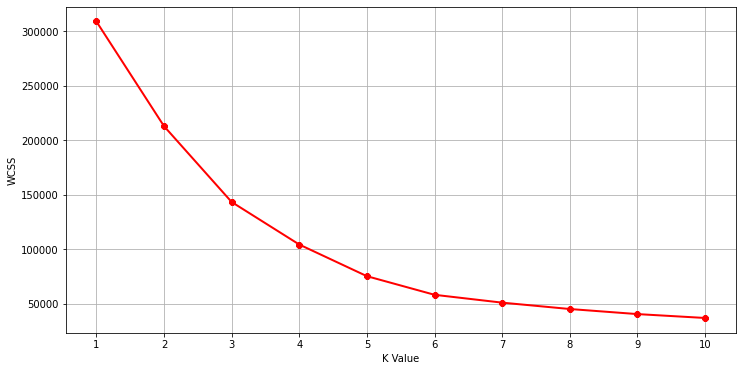

In [6]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

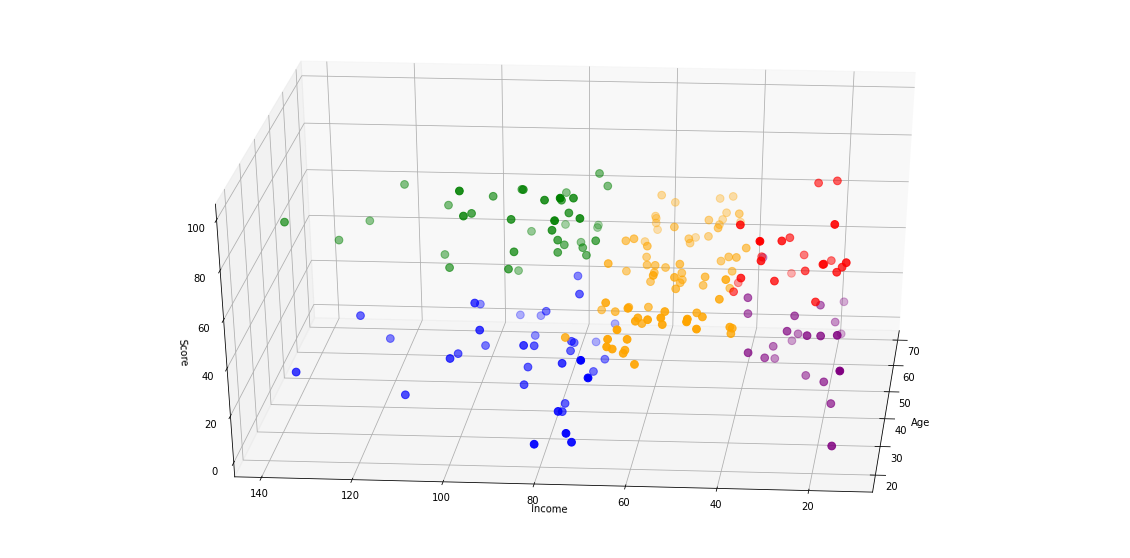

In [8]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Income"][df.label == 0], df["Score"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Income"][df.label == 1], df["Score"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Income"][df.label == 2], df["Score"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Income"][df.label == 3], df["Score"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Income"][df.label == 4], df["Score"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('Score')
plt.show()